## Packages

Let's run the cell below to import all the packages needed.


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,BatchNormalization
from tensorflow.keras.activations import linear, relu, sigmoid
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score,classification_report
%matplotlib widget
import matplotlib.pyplot as plt
import NNutils


### Loading the data

In [2]:
X_train = np.load("savedData/aug_x_train.npy")
Y_train = np.load("savedData/aug_y_train.npy")
x_small=np.load("savedData/aug_images_small.npy") #reduced version of x_train in order to try different model
y_small=np.load("savedData/aug_labels_small.npy") #reduced version of y_train in order to try different model
x_val=np.load("savedData/x_val.npy") #cross validation data 
y_val=np.load("savedData/y_val.npy") #cross validation data 
x_test=np.load("savedData/x_test.npy") #test set image
y_test=np.load("savedData/y_test.npy") #test set classification

#X_train=x_small removing the hashtag when trying to work smaller dataset
#Y_train=y_small

### Visualisation

we can print the shape of each array

In [3]:
print("the shape of X_train is", X_train.shape)
print("the shape of y is", Y_train.shape)
print("x_small shape is", x_small.shape)
print("y_small shape is", y_small.shape)
print("x_test shape is", x_test.shape)
print("y_test shape is ", y_test.shape)

the shape of X_train is (10440, 100, 100, 1)
the shape of y is (10440,)
x_small shape is (50, 100, 100, 1)
y_small shape is (50,)
x_test shape is (624, 100, 100)
y_test shape is  (624,)


we can print the first element of each array

the first element of X is [[[0.260946  ]
  [0.27114612]
  [0.27219728]
  ...
  [0.7006719 ]
  [0.70025516]
  [0.69983834]]

 [[0.26052922]
  [0.26947898]
  [0.27344763]
  ...
  [0.6917058 ]
  [0.6896219 ]
  [0.68753797]]

 [[0.26011243]
  [0.26781183]
  [0.274698  ]
  ...
  [0.6784314 ]
  [0.6784314 ]
  [0.6784314 ]]

 ...

 [[0.06458863]
  [0.06500541]
  [0.0654222 ]
  ...
  [0.23827487]
  [0.2036785 ]
  [0.17764969]]

 [[0.06666667]
  [0.06666667]
  [0.06666667]
  ...
  [0.24452665]
  [0.20617922]
  [0.18056719]]

 [[0.06666667]
  [0.06666667]
  [0.06666667]
  ...
  [0.25077844]
  [0.20867993]
  [0.18348467]]]
The first element of y is 1


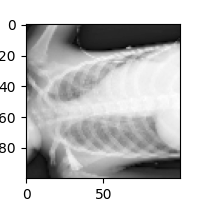

In [4]:
print("the first element of X is", X_train[0])
print("The first element of y is",Y_train[0])
NNutils.display_xRAY(X_train[8])

## Neural Network

we can now implement our simple NN model

In [5]:
#code assignment starts here
tf.random.set_seed(1234)  # applied to achieve consistent results


NN_model = Sequential((
    [
        Flatten(input_shape=(100, 100)),
        Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.1)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.1)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.1)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(3, activation='linear')   
    ]
),name='Simple_NN')

NN_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #prefered way of implementing a softmax
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)

#code assignment stops here

we can check our model's detail

In [6]:
NN_model.summary()

Model: "Simple_NN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 128)               1280128   
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                         

We use a a function that stop when the val encounter a plateau in order to avoid overfittin

In [7]:
Reduce_LR = ReduceLROnPlateau(monitor='val_accuracy', patience = 3, verbose=1,factor=0.3, min_lr=0.000001)
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

### Testing

we can then fit our model and our data


In [8]:
#code from the assignment start here:
history = NN_model.fit(
    X_train,Y_train,
    epochs=50,
    validation_data = (x_val, y_val),
    callbacks= [Reduce_LR,early_stopping],
)

#end of the code from assignment

Epoch 1/50
327/327 [==============================] - 5s 12ms/step - loss: 108.4196 - accuracy: 0.4156 - val_loss: 24.4991 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/50
327/327 [==============================] - 3s 10ms/step - loss: 15.0084 - accuracy: 0.4861 - val_loss: 14.0529 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/50
327/327 [==============================] - 3s 10ms/step - loss: 14.3076 - accuracy: 0.4847 - val_loss: 14.4733 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/50
326/327 [============================>.] - ETA: 0s - loss: 14.5814 - accuracy: 0.4847
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
327/327 [==============================] - 3s 10ms/step - loss: 14.5815 - accuracy: 0.4847 - val_loss: 14.6653 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/50
327/327 [==============================] - 3s 10ms/step - loss: 5.9270 - accuracy: 0.4847 - val_loss: 5.3418 - val_accuracy: 0.5000 - lr: 3.0000e-04
Epoch 6/50
327/327 [=========================

### Metrics on train set

We can observe the metrics of the model

In [9]:
# Prediction on our training data
y_pred_train = NN_model.predict(X_train)

#beginning of code from the assignment for softmax uses
prediction_p = tf.nn.softmax(y_pred_train)
y_pred_classes = np.argmax(prediction_p, axis=1)
#enf od code from assignment

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_train, y_pred_classes)

# Calculate precision, recall, specificity, and F1 score
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
precision = precision_score(Y_train, y_pred_classes, average=None, zero_division=1)
recall = recall_score(Y_train, y_pred_classes, average=None,zero_division=1)
f1 = f1_score(Y_train, y_pred_classes, average=None,zero_division=1)
train_accuracy = accuracy_score(Y_train, y_pred_classes)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("the specifity", specificity)
print("the training accuracy is ", train_accuracy)

Precision: [1.         0.48467433 1.        ]
Recall: [0. 1. 0.]
F1 Score: [0.         0.65290323 0.        ]
the specifity 0.0
the training accuracy is  0.4846743295019157


An other way of calculating metrics

In [10]:
print(classification_report(Y_train, y_pred_classes,zero_division=1, target_names = ['Normal (Class 0)','Bacteria (Class 1)','Viral (class 2)']))
print("Loss of the model is - " , NN_model.evaluate(X_train,Y_train)[0])
print("Accuracy of the model is - " , NN_model.evaluate(X_train,Y_train)[1]*100 , "%")

                    precision    recall  f1-score   support

  Normal (Class 0)       1.00      0.00      0.00      2682
Bacteria (Class 1)       0.48      1.00      0.65      5060
   Viral (class 2)       1.00      0.00      0.00      2698

          accuracy                           0.48     10440
         macro avg       0.83      0.33      0.22     10440
      weighted avg       0.75      0.48      0.32     10440

327/327 [==============================] - 2s 5ms/step - loss: 1.0650 - accuracy: 0.4847
Loss of the model is -  1.06496000289917
327/327 [==============================] - 2s 5ms/step - loss: 1.0650 - accuracy: 0.4847
Accuracy of the model is -  48.4674334526062 %


#### overfitting
We can plot the training accuracy and the validation accuracy to have a first idea of the overfitting of our model. If the Validation accuracy stops or decrease and the training one is increasing that might indicate case of overfitting the training set.
If the validation loss keep increasing and the training one keep decreasing that might suggest overfitting

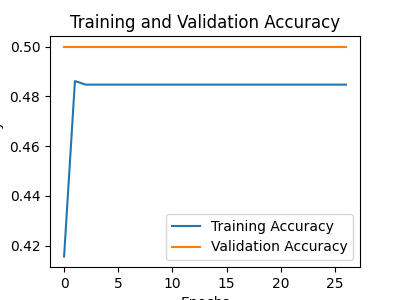

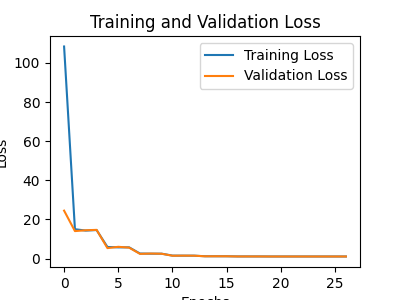

In [11]:
NNutils.plt_Training_Val_Accuracy(history)
NNutils.plt_Training_Val_loss(history)

### Prediction
we can now try our model on the test set


In [12]:
#prediction on the test set
y_pred_test=NN_model.predict(x_test)

#beginning of code from the assignment for softmax uses
prediction = tf.nn.softmax(y_pred_test)
prediction_classes = np.argmax(prediction, axis=1)
#enf od code from assignment

#print partly of the result
print("the first ten classes are :", prediction_classes[:10])

the first ten classes are : [1 1 1 1 1 1 1 1 1 1]


### Analysis of the prediction

we can calculate the metrics of our prediction of the test set this time to have even more information of our model

                    precision    recall  f1-score   support

  Normal (Class 0)       1.00      0.00      0.00       234
Bacteria (Class 1)       0.39      1.00      0.56       242
   Viral (class 2)       1.00      0.00      0.00       148

          accuracy                           0.39       624
         macro avg       0.80      0.33      0.19       624
      weighted avg       0.76      0.39      0.22       624

20/20 [==============================] - 0s 4ms/step - loss: 1.1258 - accuracy: 0.3878
Loss of the model is -  1.1257975101470947
20/20 [==============================] - 0s 4ms/step - loss: 1.1258 - accuracy: 0.3878
Accuracy of the model is -  38.78205120563507 %


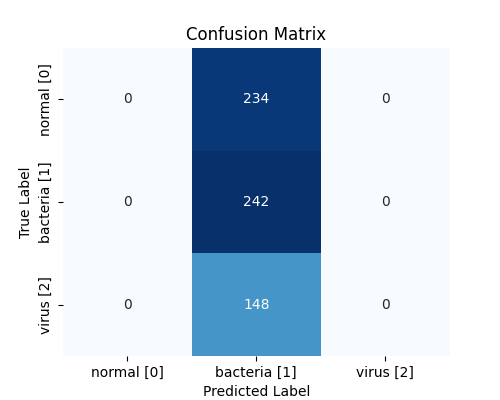

In [13]:
print(classification_report(y_test, prediction_classes,zero_division=1, target_names = ['Normal (Class 0)','Bacteria (Class 1)','Viral (class 2)']))
print("Loss of the model is - " , NN_model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , NN_model.evaluate(x_test,y_test)[1]*100 , "%")

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, prediction_classes)
NNutils.plt_conf_matrix(conf_matrix)
